In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("dataset/movies_metadata.csv")
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [3]:
data.shape

(9048, 24)

In [4]:
count = data['vote_count'].sum()
rating = data['vote_average']*data['vote_count']
rate = rating.sum()
C = rate/count
print(C)

6.736226082192209


In [5]:
from ast import literal_eval
data['genres']= data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [6]:
top = data[data['vote_count'] > 500]
top = top[['title','release_date','genres','vote_count','vote_average']]
top['rating'] = (top['vote_count']/(top['vote_count']+500))*top['vote_average']+(500/(top['vote_count']+500))*C
top = top.sort_values(by=['rating'],ascending =False)
top.head(10)

,title,release_date,genres,vote_count,vote_average,rating
169,The Shawshank Redemption,1994-09-23,"[Drama, Crime]",8358.0,8.5,8.400442
407,The Godfather,1972-03-14,"[Drama, Crime]",6024.0,8.5,8.364824
4725,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.238767
1501,Fight Club,1999-10-15,[Drama],9678.0,8.3,8.223179
158,Pulp Fiction,1994-09-10,"[Thriller, Crime]",8670.0,8.3,8.214734
285,Schindler's List,1993-11-29,"[Drama, History, War]",4436.0,8.3,8.141595
7099,Whiplash,2014-10-10,[Drama],4376.0,8.3,8.139646
2635,Spirited Away,2001-07-20,"[Fantasy, Adventure, Animation, Family]",3968.0,8.3,8.125003
191,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]",8147.0,8.2,8.115359
1153,Life Is Beautiful,1997-12-20,"[Comedy, Drama]",3643.0,8.3,8.111275


In [7]:
top.shape

(2049, 6)

In [8]:
genres = top['genres'].apply(pd.Series).stack().value_counts()
genres

Drama              801
Comedy             665
Action             652
Thriller           626
Adventure          524
Crime              337
Science Fiction    336
Fantasy            305
Romance            299
Family             283
Horror             218
Mystery            184
Animation          182
War                 71
History             70
Music               53
Western             27
Documentary          2
TV Movie             1
dtype: int64

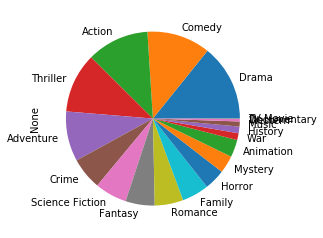

In [9]:
genres.plot.pie()

In [10]:
top['genres'].head(250).apply(pd.Series).stack().value_counts()

Drama              156
Adventure           59
Thriller            53
Action              52
Comedy              45
Crime               42
Fantasy             39
Science Fiction     37
Family              36
Romance             35
Animation           30
War                 22
Mystery             21
History             17
Horror               9
Western              6
Music                6
dtype: int64

In [11]:
def top_list(genre):
    df = top[top['genres'].apply(lambda x: genre in x)]
    return df

In [12]:
top_list('Crime').head(10)

,title,release_date,genres,vote_count,vote_average,rating
169,The Shawshank Redemption,1994-09-23,"[Drama, Crime]",8358.0,8.5,8.400442
407,The Godfather,1972-03-14,"[Drama, Crime]",6024.0,8.5,8.364824
4725,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.238767
158,Pulp Fiction,1994-09-10,"[Thriller, Crime]",8670.0,8.3,8.214734
594,The Godfather: Part II,1974-12-20,"[Drama, Crime]",3418.0,8.3,8.100437
157,Leon: The Professional,1994-09-14,"[Thriller, Crime, Drama]",4293.0,8.2,8.047301
1596,The Green Mile,1999-12-10,"[Fantasy, Drama, Crime]",4166.0,8.2,8.043145
586,GoodFellas,1990-09-12,"[Drama, Crime]",3211.0,8.2,8.002779
34,Se7en,1995-09-22,"[Crime, Mystery, Thriller]",5915.0,8.1,7.993704
320,The Silence of the Lambs,1991-02-01,"[Crime, Drama, Thriller]",4549.0,8.1,7.964946


In [13]:
top_list('Romance').head(10)

,title,release_date,genres,vote_count,vote_average,rating
191,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]",8147.0,8.2,8.115359
3960,Dilwale Dulhania Le Jayenge,1995-10-20,"[Comedy, Drama, Romance]",661.0,9.1,8.082010
8645,Your Name.,2016-08-26,"[Romance, Animation, Drama]",1030.0,8.5,7.923603
8702,La La Land,2016-11-29,"[Comedy, Drama, Music, Romance]",4745.0,7.9,7.789059
6798,Her,2013-12-18,"[Romance, Science Fiction, Drama]",4215.0,7.9,7.776588
3214,Eternal Sunshine of the Spotless Mind,2004-03-19,"[Science Fiction, Drama, Romance]",3758.0,7.9,7.763343
2405,Amélie,2001-04-25,"[Comedy, Romance]",3403.0,7.8,7.663724
7334,The Theory of Everything,2014-11-26,"[Drama, Romance]",3403.0,7.8,7.663724
554,Cinema Paradiso,1988-11-17,"[Drama, Romance]",834.0,8.2,7.651359
5478,Mr. Nobody,2009-09-11,"[Science Fiction, Drama, Romance, Fantasy]",1616.0,7.9,7.625006


In [14]:
top_list('Action').head(10)

,title,release_date,genres,vote_count,vote_average,rating
4725,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.238767
570,The Empire Strikes Back,1980-05-17,"[Adventure, Action, Science Fiction]",5998.0,8.2,8.087367
5467,Inception,2010-07-14,"[Action, Thriller, Science Fiction, Mystery, A...",14075.0,8.1,8.053215
3145,The Lord of the Rings: The Return of the King,2003-12-01,"[Adventure, Fantasy, Action]",8226.0,8.1,8.021856
141,Star Wars,1977-05-25,"[Adventure, Action, Science Fiction]",6778.0,8.1,8.006308
2415,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,"[Adventure, Fantasy, Action]",8892.0,8.0,7.932721
2735,The Lord of the Rings: The Two Towers,2002-12-18,"[Adventure, Fantasy, Action]",7641.0,8.0,7.922382
7114,Guardians of the Galaxy,2014-07-30,"[Action, Science Fiction, Adventure]",10014.0,7.9,7.844656
1308,The Matrix,1999-03-30,"[Action, Science Fiction]",9079.0,7.9,7.839254
2105,Scarface,1983-12-08,"[Action, Crime, Drama, Thriller]",3017.0,8.0,7.820334


In [15]:
top_list('Drama').head(10)

,title,release_date,genres,vote_count,vote_average,rating
169,The Shawshank Redemption,1994-09-23,"[Drama, Crime]",8358.0,8.5,8.400442
407,The Godfather,1972-03-14,"[Drama, Crime]",6024.0,8.5,8.364824
4725,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.238767
1501,Fight Club,1999-10-15,[Drama],9678.0,8.3,8.223179
285,Schindler's List,1993-11-29,"[Drama, History, War]",4436.0,8.3,8.141595
7099,Whiplash,2014-10-10,[Drama],4376.0,8.3,8.139646
191,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]",8147.0,8.2,8.115359
1153,Life Is Beautiful,1997-12-20,"[Comedy, Drama]",3643.0,8.3,8.111275
594,The Godfather: Part II,1974-12-20,"[Drama, Crime]",3418.0,8.3,8.100437
3960,Dilwale Dulhania Le Jayenge,1995-10-20,"[Comedy, Drama, Romance]",661.0,9.1,8.082010


In [16]:
top_list('War').head(10)

,title,release_date,genres,vote_count,vote_average,rating
285,Schindler's List,1993-11-29,"[Drama, History, War]",4436.0,8.3,8.141595
7307,The Imitation Game,2014-11-14,"[History, Drama, Thriller, War]",5895.0,8.0,7.901190
2755,The Pianist,2002-09-24,"[Drama, War]",1927.0,8.1,7.819041
5059,Inglourious Basterds,2009-08-18,"[Drama, Action, Thriller, War]",6598.0,7.9,7.818021
992,Saving Private Ryan,1998-07-24,"[Drama, History, War]",5148.0,7.9,7.796975
581,Apocalypse Now,1979-08-15,"[Drama, War]",2112.0,8.0,7.758083
595,Full Metal Jacket,1987-06-26,"[Drama, War]",2595.0,7.9,7.711991
2660,Grave of the Fireflies,1988-04-16,"[Animation, Drama, War]",974.0,8.2,7.703469
371,Dr. Strangelove or: How I Learned to Stop Worr...,1964-01-29,"[Drama, Comedy, War]",1472.0,8.0,7.679571
8650,Hacksaw Ridge,2016-10-07,"[Drama, History, War]",3294.0,7.8,7.659808


In [17]:
data['description'] = data['title']+' '+data['tagline'].fillna('') +' '+ data['overview'].fillna('')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2))
matrix = tfidf.fit_transform(data['description'])
matrix.shape

(9048, 269429)

In [19]:
from sklearn.metrics.pairwise import linear_kernel
similarity = linear_kernel(matrix, matrix)

In [20]:
titles = data[['title','vote_count','vote_average']]
index = pd.Series(data.index, index=data['title'])

In [48]:
def get_recommendation(title):
    ind = index[title]
    score = list(enumerate(similarity[ind]))
    score = sorted(score, key=lambda x: x[1], reverse=True)
    score = score[:50]
    
    count = score['vote_count'].sum()
    m = score['vote_count'].min()
    rating = score['vote_average']*score['vote_count']
    rate = rating.sum()
    C = rate/count
    
    score['rating'] = (score['vote_count']/(score['vote_count']+m))*score['vote_average']+(m/(score['vote_count']+m))*C
    
    movie_indices = [i[0] for i in score]
    return pd.DataFrame(titles.iloc[movie_indices])

In [22]:
get_recommendation('The Godfather')

,title,vote_count,vote_average
594,The Godfather: Part II,3418.0,8.3
6699,The Family,1052.0,6.1
7131,The Italian,53.0,5.5
6979,Blood Ties,175.0,6.0
988,The Godfather: Part III,1589.0,7.1
2197,Made,55.0,6.3
4126,Election,51.0,6.7
2615,Johnny Dangerously,67.0,6.3
8766,Live by Night,416.0,6.2
1526,American Movie,57.0,7.7


In [23]:
get_recommendation('Toy Story')

,title,vote_count,vote_average
1587,Toy Story 2,3914.0,7.3
5451,Toy Story 3,4710.0,7.6
3957,The 40 Year Old Virgin,2020.0,6.2
7263,Small Fry,118.0,6.8
1608,Man on the Moon,444.0,6.9
6748,Toy Story of Terror!,246.0,7.3
4396,Factory Girl,83.0,6.2
535,Rebel Without a Cause,351.0,7.6
7438,Toy Story That Time Forgot,249.0,6.8
6605,Woody Allen: A Documentary,56.0,7.5


In [24]:
get_recommendation('Dilwale Dulhania Le Jayenge')

,title,vote_count,vote_average
8316,Dilwale,68.0,6.3
3120,A Passage to India,69.0,6.8
5329,Love Stories,59.0,6.9
5983,Chak De! India,69.0,6.8
6618,Bhaag Milkha Bhaag,62.0,7.3
4562,Rang De Basanti,98.0,7.2
3738,Kal Ho Naa Ho,110.0,7.3
4750,Happy-Go-Lucky,130.0,6.4
3506,Veer-Zaara,67.0,7.5
5356,The Room,191.0,4.3


In [25]:
get_recommendation('The Dark Knight')

,title,vote_count,vote_average
5962,The Dark Knight Rises,9263.0,7.6
79,Batman Forever,1529.0,5.2
3693,Batman Beyond: Return of the Joker,152.0,7.5
319,Batman,2145.0,7.0
6406,"Batman: The Dark Knight Returns, Part 2",426.0,7.9
1630,Batman: Mask of the Phantasm,218.0,7.4
6334,"Batman: The Dark Knight Returns, Part 1",410.0,7.7
709,Batman Returns,1706.0,6.6
5908,Batman: Year One,255.0,7.1
7379,Batman vs Dracula,58.0,6.5


In [26]:
get_recommendation('Iron Man')

,title,vote_count,vote_average
5413,Iron Man 2,6969.0,6.6
6523,Iron Man 3,8951.0,6.8
6515,Iron Man: Rise of Technovore,61.0,5.2
7641,Clown,372.0,5.3
7499,Avengers: Age of Ultron,6908.0,7.3
5426,The Disappearance of Alice Creed,169.0,6.4
6211,Brake,75.0,5.3
3846,Hostage,519.0,6.2
2234,Tetsuo: The Iron Man,110.0,6.7
3528,Scarface,88.0,7.5


In [27]:
get_recommendation('Man of Steel')

,title,vote_count,vote_average
8763,The Space Between Us,564.0,7.2
1336,Superman,1042.0,6.9
1337,Superman II,642.0,6.5
5034,Ong Bak 2,156.0,5.9
3371,The Chronicles of Riddick,1593.0,6.3
3554,L'eclisse,68.0,7.7
3500,The Polar Express,1524.0,6.4
1869,Titan A.E.,320.0,6.3
6130,Superman vs. The Elite,103.0,6.6
4116,London,96.0,6.1


In [28]:
credits = pd.read_csv("dataset/credits.csv")
keywords = pd.read_csv("dataset/keywords.csv")

In [29]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
4,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949


In [30]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [31]:
data = data.merge(credits, on='id')
data = data.merge(keywords, on='id')

In [32]:
data['cast']= data['cast'].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data['cast']= data['cast'].apply(lambda x: x[:5] if len(x)>=5 else x)
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,description,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [33]:
def get_crew(x):
    list = []
    for i in x:
        if i['job'] == 'Director' or i['job'] =='Screenplay':
            list.append(i['name'])
    return list

In [34]:
data['crew']= data['crew'].apply(literal_eval).apply(get_crew)
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,description,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Jonathan Hensleigh, Joe Johnston, Greg Taylor...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Nancy Meyers, Albert Hackett, Charles Shyer]","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Michael Mann, Michael Mann]","[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."


In [35]:
data['keywords'] = data['keywords'].apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,description,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J...","[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Jonathan Hensleigh, Joe Johnston, Greg Taylor...","[board game, disappearance, based on children'..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Nancy Meyers, Albert Hackett, Charles Shyer]","[baby, midlife crisis, confidence, aging, daug..."
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Michael Mann, Michael Mann]","[robbery, detective, bank, obsession, chase, s..."


In [36]:
data['cast']= data['cast'].apply(lambda x: [i.replace(" ","") for i in x])
data['crew']= data['crew'].apply(lambda x: [i.replace(" ","") for i in x])
data['keywords']= data['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,description,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[JohnLasseter, JossWhedon, AndrewStanton, Joel...","[jealousy, toy, boy, friendship, friends, riva..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...,"[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[JonathanHensleigh, JoeJohnston, GregTaylor, J...","[boardgame, disappearance, basedonchildren'sbo..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...,"[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...,"[SteveMartin, DianeKeaton, MartinShort, Kimber...","[NancyMeyers, AlbertHackett, CharlesShyer]","[baby, midlifecrisis, confidence, aging, daugh..."
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...,"[AlPacino, RobertDeNiro, ValKilmer, JonVoight,...","[MichaelMann, MichaelMann]","[robbery, detective, bank, obsession, chase, s..."


In [37]:
data['content'] = data['genres']+data['cast']+data['crew']+data['keywords']
data['content'] = data['content'].apply(lambda x: ' '.join(x))
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,description,cast,crew,keywords,content
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,"Toy Story Led by Woody, Andy's toys live happ...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...","[JohnLasseter, JossWhedon, AndrewStanton, Joel...","[jealousy, toy, boy, friendship, friends, riva...",Animation Comedy Family TomHanks TimAllen DonR...
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Jumanji Roll the dice and unleash the exciteme...,"[RobinWilliams, JonathanHyde, KirstenDunst, Br...","[JonathanHensleigh, JoeJohnston, GregTaylor, J...","[boardgame, disappearance, basedonchildren'sbo...",Adventure Fantasy Family RobinWilliams Jonatha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old Men Still Yelling. Still Fighting...,"[WalterMatthau, JackLemmon, Ann-Margret, Sophi...",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol...",Romance Comedy WalterMatthau JackLemmon Ann-Ma...
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part II Just When His Worl...,"[SteveMartin, DianeKeaton, MartinShort, Kimber...","[NancyMeyers, AlbertHackett, CharlesShyer]","[baby, midlifecrisis, confidence, aging, daugh...",Comedy SteveMartin DianeKeaton MartinShort Kim...
4,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,Heat A Los Angeles Crime Saga Obsessive master...,"[AlPacino, RobertDeNiro, ValKilmer, JonVoight,...","[MichaelMann, MichaelMann]","[robbery, detective, bank, obsession, chase, s...",Action Crime Drama Thriller AlPacino RobertDeN...


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2))
matrix = count.fit_transform(data['content'])
matrix.shape

(9187, 158076)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(matrix,matrix)

In [40]:
titles = data[['title','vote_count','vote_average']]
index = pd.Series(data.index, index=data['title'])

In [49]:
get_recommendation('The Godfather')

TypeError: list indices must be integers or slices, not str

In [42]:
get_recommendation('Toy Story')

,title,vote_count,vote_average
6794,Toy Story of Terror!,246.0,7.3
1587,Toy Story 2,3914.0,7.3
7491,Toy Story That Time Forgot,249.0,6.8
9168,Banana,139.0,7.2
3407,Garfield,851.0,5.2
9179,Minions: Orientation Day,95.0,7.0
4243,Garfield: A Tail of Two Kitties,477.0,5.1
7490,Partysaurus Rex,81.0,7.4
5492,Toy Story 3,4710.0,7.6
8603,Finding Dory,4333.0,6.8


In [43]:
get_recommendation('Dilwale Dulhania Le Jayenge')

,title,vote_count,vote_average
4990,Rab Ne Bana Di Jodi,64.0,6.7
5398,My Name Is Khan,237.0,7.7
7897,Jab Tak Hai Jaan,68.0,7.2
5370,Love Stories,59.0,6.9
4670,Om Shanti Om,85.0,7.2
3541,Veer-Zaara,67.0,7.5
1118,About Last Night...,51.0,5.6
3729,Devdas,78.0,7.4
3876,Diary of a Mad Black Woman,71.0,6.4
5481,Sex and the City 2,434.0,5.5


In [44]:
get_recommendation('Iron Man')

,title,vote_count,vote_average
5454,Iron Man 2,6969.0,6.6
6571,Iron Man 3,8951.0,6.8
5910,The Avengers,12000.0,7.4
1893,X-Men,4172.0,6.8
8885,Marvel One-Shot: The Consultant,108.0,6.6
7561,Captain America: Civil War,7462.0,7.1
5811,X-Men: First Class,5252.0,7.1
6679,The Wolverine,4110.0,6.3
7557,Ant-Man,6029.0,7.0
7562,Doctor Strange,5880.0,7.1


In [45]:
get_recommendation('Man of Steel')

,title,vote_count,vote_average
7979,Batman v Superman: Dawn of Justice,7189.0,5.7
1338,Superman III,500.0,5.3
4760,Justice League: The New Frontier,115.0,6.6
1337,Superman II,642.0,6.5
4246,Superman Returns,1429.0,5.4
1336,Superman,1042.0,6.9
6724,Justice League: Crisis on Two Earths,152.0,7.1
6679,The Wolverine,4110.0,6.3
7078,X-Men: Days of Future Past,6155.0,7.5
7562,Doctor Strange,5880.0,7.1


In [46]:
get_recommendation('The Dark Knight')

,title,vote_count,vote_average
6003,The Dark Knight Rises,9263.0,7.6
3945,Batman Begins,7511.0,7.5
4339,The Prestige,4510.0,8.0
3709,Thursday,84.0,7.0
5517,Batman: Under the Red Hood,459.0,7.6
7701,Kidnapping Mr. Heineken,193.0,5.8
7184,Batman: Assault on Arkham,298.0,7.3
709,Batman Returns,1706.0,6.6
8730,Batman: The Killing Joke,485.0,6.2
770,Batman & Robin,1447.0,4.2


In [47]:
get_recommendation('The Prestige')

,title,vote_count,vote_average
4766,The Dark Knight,12269.0,8.3
6003,The Dark Knight Rises,9263.0,7.6
2088,Memento,4168.0,8.1
2828,Spider,176.0,6.4
4690,The Flock,63.0,5.7
6115,Meeting Evil,59.0,4.7
3945,Batman Begins,7511.0,7.5
1310,Following,363.0,7.2
8140,Queen of Earth,58.0,6.2
5508,Inception,14075.0,8.1
